In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.shape

(5572, 5)

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5444,ham,Good morning. At the repair shop--the ONLY rea...,NaN,NaN,NaN
2762,ham,ARR birthday today:) i wish him to get more os...,NaN,NaN,NaN
5505,ham,What i told before i tell. Stupid hear after i...,NaN,NaN,NaN
2487,ham,K ill drink.pa then what doing. I need srs mod...,NaN,NaN,NaN
4085,ham,Lemme know when you're here,NaN,NaN,NaN


In [5]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
df.info() # all columns are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.isnull().mean()*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

([<matplotlib.patches.Wedge at 0x1f9459ef590>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.0038714746336121, -0.44971331136284726, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '86.59%'),
  Text(0.5475662588910611, -0.24529816983428027, '13.41%')])

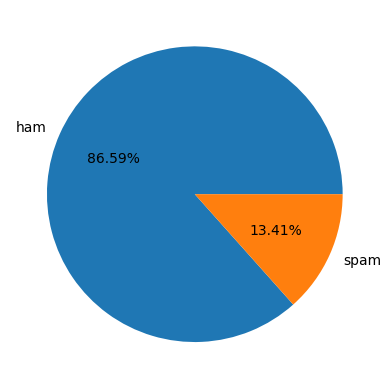

In [9]:
plt.pie(df['v1'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f%%')

<Axes: xlabel='count', ylabel='v1'>

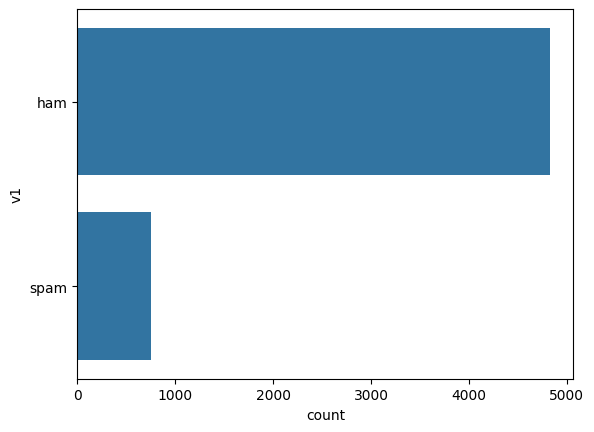

In [10]:
sns.countplot(df['v1'])

In [11]:
arr = list(df.duplicated())

In [12]:
row_no = []
for i in range(0,len(arr)):
    
    if arr[i] == True :
        row_no.append(i)

    else:
        continue
    
    

In [13]:
len(row_no)


403

In [14]:
df = df.drop(row_no) # removing duplicated data

In [15]:
df.shape

(5169, 5)

In [16]:
df['v2'].nunique()

5169

In [17]:
df.fillna({'Unnamed: 2' : 'Missing','Unnamed: 3' : 'Missing','Unnamed: 4' : 'Missing'}, inplace = True) # filling missing values

In [18]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [19]:
df.rename(columns = {'v1':'Target','v2':'text'}, inplace = True)

In [20]:
df

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
##df = pd.get_dummies(df, columns = ['text'], drop_first = True) 

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
le.fit(df['Target'])

LabelEncoder()

In [25]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [26]:
target = le.transform(df['Target'])

In [27]:
df['Target'] = target

##EDA

In [28]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [29]:
import nltk

In [30]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shour\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
arr = list(df['text'])

In [32]:
arr[0].replace(' ','')

'Gountiljurongpoint,crazy..Availableonlyinbugisngreatworldlaebuffet...Cinetheregotamorewat...'

In [33]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [34]:
df['num_tsentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
df['num_characters'] = df['text'].apply(len)

In [36]:
df[df['Target']== 0][['num_words','num_tsentences','num_characters']].describe() #ham

,num_words,num_tsentences,num_characters
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


<Axes: xlabel='num_characters', ylabel='Count'>

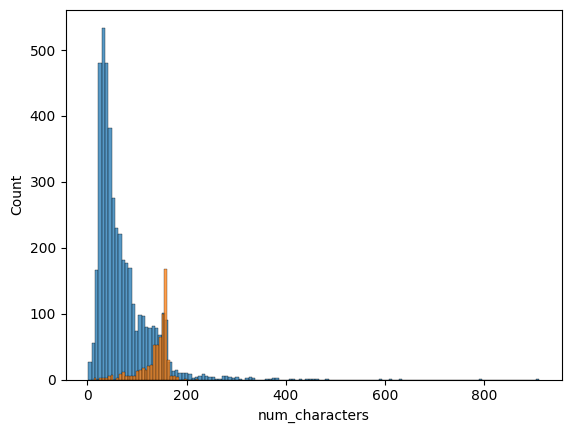

In [37]:
sns.histplot(df[df['Target']== 0]['num_characters'])
sns.histplot(df[df['Target']== 1]['num_characters'])

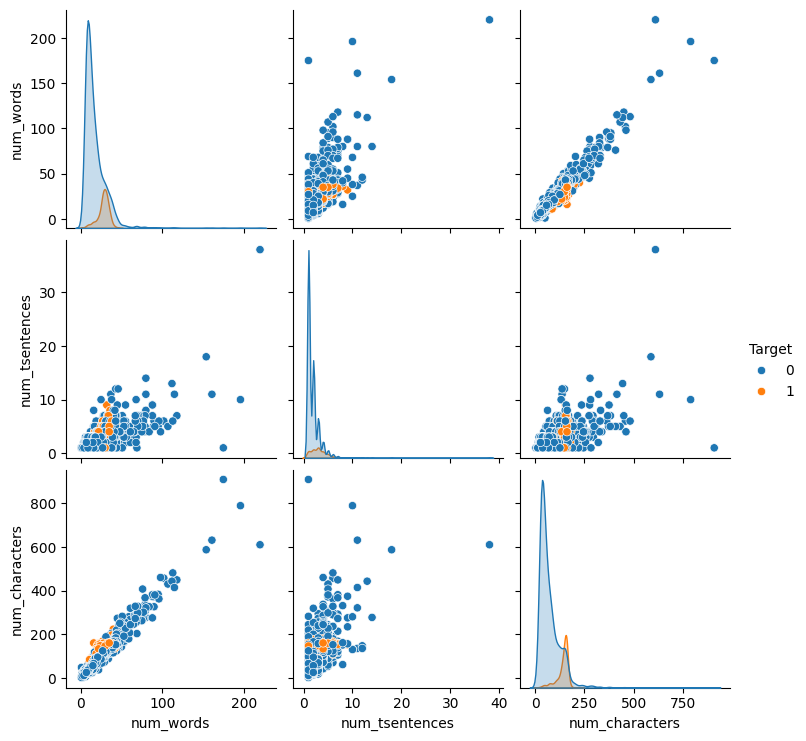

In [38]:
sns.pairplot(df,hue = 'Target')

<Axes: >

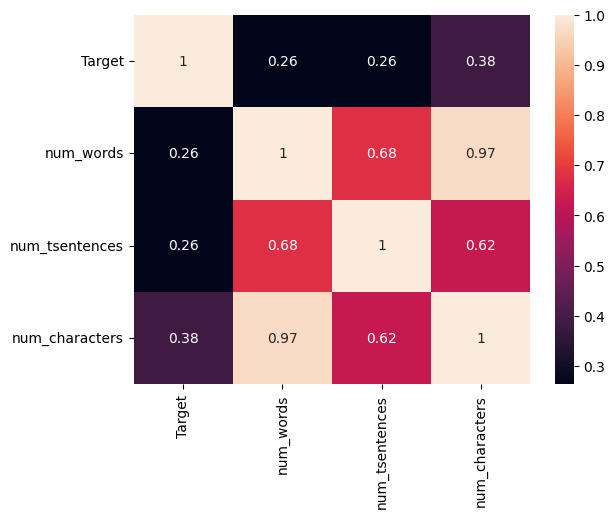

In [39]:
new_df = df[['Target','num_words','num_tsentences','num_characters']]
sns.heatmap(new_df.corr(),annot = True)
# Correlation

## DATA PREPROCESSING
1) Lower case
2) Tokenization
3) removing special characters
4) removing stop words and punctuation
5) stemming
   

In [40]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shour\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
import string

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

    

In [44]:
df['transform_text'] = df['text'].apply(transform_text)

In [45]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [46]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')

In [47]:
spam_wc = wc.generate(df[df['Target']==1]['transform_text'].str.cat(sep=' '))

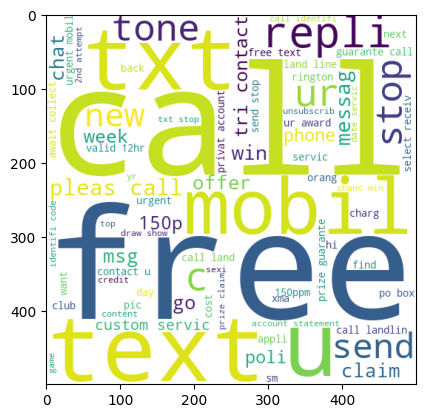

In [48]:
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['Target']==0]['transform_text'].str.cat(sep=' '))

In [50]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

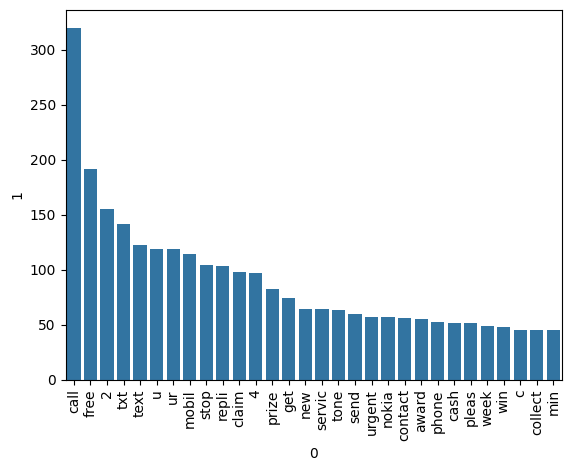

In [51]:
from collections import Counter 
spam = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x = spam[0],y = spam[1])
plt.xticks(rotation = 'vertical')
plt.show()

## Model Building 

In [52]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
Tfidf = TfidfVectorizer(max_features = 3000)
cv = CountVectorizer()

In [53]:
x = Tfidf.fit_transform(df["transform_text"]).toarray()

In [54]:
x.shape

(5169, 3000)

In [55]:
y = df['Target'].values

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [60]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y1 = gnb.predict(x_test)
print(accuracy_score(y_test,y1))
print(confusion_matrix(y_test,y1))
print(precision_score(y_test,y1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [61]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y1 = mnb.predict(x_test)
print(accuracy_score(y_test,y1))
print(confusion_matrix(y_test,y1))
print(precision_score(y_test,y1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [62]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y1 = bnb.predict(x_test)
print(accuracy_score(y_test,y1))
print(confusion_matrix(y_test,y1))
print(precision_score(y_test,y1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [63]:
import pickle

In [67]:
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))